In [ ]:
!wget https://archive.org/download/full_grams_cbow_300_twitter/full_grams_cbow_300_twitter.zip
!unzip full_grams_cbow_300_twitter.zip

--2023-11-18 08:38:49--  https://archive.org/download/full_grams_cbow_300_twitter/full_grams_cbow_300_twitter.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia902803.us.archive.org/15/items/full_grams_cbow_300_twitter/full_grams_cbow_300_twitter.zip [following]
--2023-11-18 08:38:49--  https://ia902803.us.archive.org/15/items/full_grams_cbow_300_twitter/full_grams_cbow_300_twitter.zip
Resolving ia902803.us.archive.org (ia902803.us.archive.org)... 207.241.232.103
Connecting to ia902803.us.archive.org (ia902803.us.archive.org)|207.241.232.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3325529808 (3.1G) [application/zip]
Saving to: ‘full_grams_cbow_300_twitter.zip’

full_grams_cbow_300 100%[===================>]   3.10G  9.31MB/s    in 6m 33s  

2023-11-18 08:45:22 (8.06 MB/s) - ‘full_grams_cbow_300_twitter.zi

# **NLP**

In [ ]:
import gensim
import re
import numpy as np
from nltk import ngrams

# =========================
# ==== Helper Methods =====

# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']

    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)

    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    #trim
    text = text.strip()

    return text

def get_vec(n_model,dim, token):
    vec = np.zeros(dim)
    is_vec = False
    if token not in n_model.wv:
        _count = 0
        is_vec = True
        for w in token.split("_"):
            if w in n_model.wv:
                _count += 1
                vec += n_model.wv[w]
        if _count > 0:
            vec = vec / _count
    else:
        vec = n_model.wv[token]
    return vec

def calc_vec(pos_tokens, neg_tokens, n_model, dim):
    vec = np.zeros(dim)
    for p in pos_tokens:
        vec += get_vec(n_model,dim,p)
    for n in neg_tokens:
        vec -= get_vec(n_model,dim,n)

    return vec

## -- Retrieve all ngrams for a text in between a specific range
def get_all_ngrams(text, nrange=3):
    text = re.sub(r'[\,\.\;\(\)\[\]\_\+\#\@\!\?\؟\^]', ' ', text)
    tokens = [token for token in text.split(" ") if token.strip() != ""]
    ngs = []
    for n in range(2,nrange+1):
        ngs += [ng for ng in ngrams(tokens, n)]
    return ["_".join(ng) for ng in ngs if len(ng)>0 ]

## -- Retrieve all ngrams for a text in a specific n
def get_ngrams(text, n=2):
    text = re.sub(r'[\,\.\;\(\)\[\]\_\+\#\@\!\?\؟\^]', ' ', text)
    tokens = [token for token in text.split(" ") if token.strip() != ""]
    ngs = [ng for ng in ngrams(tokens, n)]
    return ["_".join(ng) for ng in ngs if len(ng)>0 ]

## -- filter the existed tokens in a specific model
def get_existed_tokens(tokens, n_model):
    return [tok for tok in tokens if tok in n_model.wv ]

# **NGrams**

In [ ]:
# ============================
# ====== N-Grams Models ======

t_model = gensim.models.Word2Vec.load('full_grams_cbow_300_twitter.mdl')

# **Most Related Words to يسامر**

First diplay mode (Buttons) : Here the user enters a word (ex. يسامر). The default result includes 30 most related words to this word. Then each time the user clicks on 'المزيد', more results appear (10 more words per click). And the word cloud will include all the words that were displayed by the user.

In [ ]:
import pandas as pd

keyword = u'يسامر'
token = clean_str(keyword).replace(" ", "_")
df = {'Word': keyword, 'SimilarWords': [], 'CosineScores': []}

topn = 30  # Initial value for topn

while True:
    if token in t_model.wv:
        most_similar = t_model.wv.most_similar(token, topn=topn)

        if topn == 30:  # Display all 30 words in the first iteration
            words_to_display = most_similar

        else:
            words_to_display = most_similar[-10:]  # Display only the last 10 words from the second iteration onward

        for term, score in words_to_display:
            term = clean_str(term).replace("_", " ")
            if term != token:
                print(term, score)
                df['SimilarWords'].append(term)
                df['CosineScores'].append(score)

        # Display the results in a DataFrame
        df_results = pd.DataFrame(df)

        # Ask the user if they want to see more similar words
        user_input = input(f"Do you want to see more similar words? (Enter 'More' or 'No'): ")
        if user_input.lower() == 'more':
            topn += 10  # Increment topn by 10 for the next iteration
        else:
            break
    else:
        print("Token not found in the word vectors.")
        break

تسامر 0.5405265688896179
ويداعب 0.5239818692207336
واناجي 0.5211308598518372
يناجي 0.516990065574646
واسامر 0.5036234855651855
تسامرني 0.5024042129516602
يراقص 0.502082109451294
ينوح 0.47748300433158875
ويسهر 0.4769526720046997
ويعانق 0.47693654894828796
اسامر 0.47422003746032715
يتهادي 0.4739275276660919
مسامر 0.46881937980651855
ويناجي 0.46685513854026794
سامرت 0.4659302532672882
وطيف 0.46516385674476624
ساهرن 0.458615243434906
يعزفني 0.4570961892604828
واراقص 0.45474496483802795
ويعزف 0.4543742835521698
يداعب 0.45426398515701294
لاداعب 0.45316898822784424
ليغفو 0.4529701769351959
لانتصف 0.4493579864501953
يشاكس 0.44791677594184875
يهفو 0.44748929142951965
يسامرني 0.446893572807312
يشدو 0.4466244876384735
وهاضت 0.445733904838562
بهمسات 0.4447447657585144
Do you want to see more similar words? (Enter 'More' or 'No'): more
وهاجوس 0.4443613588809967
هاجع 0.44426149129867554
فيشدو 0.44423234462738037
وارياح 0.4438205659389496
ومسامر 0.44222500920295715
وهمسات 0.43996763229370117
وليلنا 0

In [ ]:
!pip install wordcloud

# **WordCloud of the word يسامر**

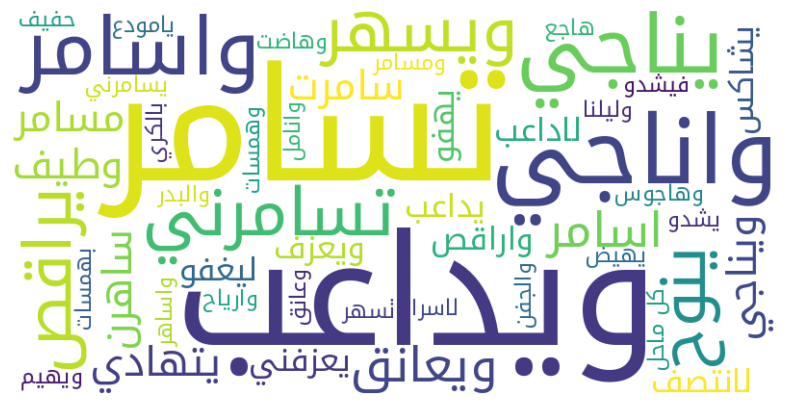

In [ ]:
# Create a WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

arabic_font_path = "NotoKufiArabic-VariableFont_wght.ttf"
arabic_font = {"font_path": arabic_font_path, "width": 800, "height": 400, "background_color": 'white'}

wordcloud = WordCloud(**arabic_font).generate_from_frequencies(
dict(zip(df_results['SimilarWords'], df_results['CosineScores']))
    )

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **3D Graph Net of the word يسامر**

In [ ]:
# Extract Arabic words and their frequencies from the CSV
arabic_words = df_results['SimilarWords'].tolist()

# Convert DataFrame to dictionary
word_frequencies = df_results.set_index('SimilarWords')['CosineScores'].to_dict()

# Multiply all values by 10 using a dictionary comprehension
word_frequencies = {key: value * 10 for key, value in word_frequencies.items()}

In [ ]:

# Create a graph
knowledge_graph = nx.Graph()

# Add nodes (Arabic words) with their sizes based on frequency
for word, freq in word_frequencies.items():
    knowledge_graph.add_node(word, size=freq)

# Generate random edges to create connections
edges = []

# Randomly connect nodes to form edges
for node in arabic_words:
    num_edges = random.randint(3, 5)  # Randomly choose the number of edges for each node
    for _ in range(num_edges):
        connected_node = random.choice(arabic_words)
        if connected_node != node and (node, connected_node) not in edges and (connected_node, node) not in edges:
            edges.append((node, connected_node))

knowledge_graph.add_edges_from(edges)

# Position the nodes in a 3D layout
pos = nx.spring_layout(knowledge_graph, dim=3)

# Prepare the edges for visualization
edge_x = []
edge_y = []
edge_z = []
for edge in knowledge_graph.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='rgb(125,125,125)', width=2),
)

# Prepare the nodes for visualization with colorscale based on frequency
node_x = [pos[word][0] for word in arabic_words]
node_y = [pos[word][1] for word in arabic_words]
node_z = [pos[word][2] for word in arabic_words]

# Convert NodeView to list of strings
node_labels = list(knowledge_graph.nodes())

# Specify URLs for each node
node_urls = 'https://www.figma.com/file/eGLIs8ZVqtXR60xSKMz1gK/%D8%A8%D8%B1%D9%85%D8%AC%D8%A7%D9%86?type=design&node-id=0-1&mode=design'


'''node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(size=[word_frequencies[word] * 10 for word in arabic_words], color=[word_frequencies[word] for word in arabic_words], colorscale='Viridis', colorbar=dict(title='Frequency')),
    text=arabic_words,
    textposition='middle center',
    textfont=dict(size=10, color='black')
)'''


node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(size=[word_frequencies[word] * 10 for word in arabic_words], color=[word_frequencies[word] for word in arabic_words], colorscale='Viridis', colorbar=dict(title='Frequency')),
    text=node_labels, #or arabic_words
    textposition='middle center',
    textfont=dict(size=10, color='black'),
    hoverinfo='text',  # Show text on hover
    hovertext= [f'<a href="{node_urls}">البحث عن : {label}</a>' for label in node_labels]   # Specify URLs for hover
)

# Create the 3D knowledge graph figure
fig = go.Figure(data=[edge_trace, node_trace])

# Set layout options
fig.update_layout(title=' شبكة العلاقات الدلالية ثلاثية الأبعاد لكلمة - '+keyword+' -', showlegend=False)

# Show the 3D knowledge graph
py.iplot(fig)
